In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='openpyxl')

# lecture des données

## Dataframe ERP

In [2]:
# import des données
df_erp = pd.read_excel("erp.xlsx")
df_erp

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock
...,...,...,...,...,...
820,7203,0,45.0,30,instock
821,7204,0,45.0,9,instock
822,7247,1,54.8,23,instock
823,7329,0,26.5,14,instock


In [3]:
# observation de la taille du dataframe
df_erp.shape

(825, 5)

In [4]:
# observation des infos contenues dans le dataframe
df_erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


In [5]:
# observation de la description du dataframe
df_erp.describe()

,product_id,onsale_web,price,stock_quantity
count,825.000000,825.000000,825.000000,825.000000
mean,5162.597576,0.869091,32.415636,26.496970
std,902.644635,0.337506,26.795849,45.892422
min,3847.000000,0.000000,5.200000,0.000000
25%,4348.000000,1.000000,14.600000,1.000000
50%,4907.000000,1.000000,24.400000,11.000000
75%,5805.000000,1.000000,42.000000,34.000000
max,7338.000000,1.000000,225.000000,578.000000


In [6]:
# vérification de la présence de valeurs nuls
df_erp.isnull().sum()

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64

In [7]:
# vérification que product_id ne contient que des valeurs uniques et peut servir de clé primaire
df_erp['product_id'].nunique() == len(df_erp)

True

Observation de df_erp:  
Le df contient 5 colonnes et 825 lignes  
Il n'y a pas de valeur nul dans le dataframe  
product_id, qui correspond au référence produit, ne contient que des valeurs uniques et peut etre utilisé comme clé primaire

## dataframe de liaisons

In [8]:
# importation des données
df_liaison = pd.read_excel('liaison.xlsx')
df_liaison

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
820,7203,NaN
821,7204,NaN
822,7247,13127-1
823,7329,14680-1


In [9]:
# observation de la taille du dataframe
df_liaison.shape

(825, 2)

In [10]:
# observation des infos contenues dans le dataframe
df_liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [11]:
# vérification de la présence de valeurs nuls
df_liaison.isnull().sum()

product_id     0
id_web        91
dtype: int64

In [12]:
# vérification que product_id ne contient que des valeurs uniques et peut servir de clé primaire
df_liaison['product_id'].nunique() == len(df_liaison)

True

In [13]:
# vérification que id_web ne contient que des valeurs uniques et peut servir de clé primaire
df_liaison['id_web'].nunique() == len(df_liaison)

False

In [14]:
# observation des valeurs en doublon de la colonne id_web
df_liaison.loc[df_liaison["id_web"].duplicated(keep = False)]

,product_id,id_web
19,4055,NaN
49,4090,NaN
50,4092,NaN
119,4195,NaN
131,4209,NaN
...,...,...
817,7196,NaN
818,7200,NaN
819,7201,NaN
820,7203,NaN


In [62]:
# AJOUT: tableau des valeur qui ne sont pas nul id_web pour vérif si unique par la suite
df_liai_nnul = df_liaison[df_liaison["id_web"].notnull()]
df_liai_nnul

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
792,7023,15891
793,7025,15887
822,7247,13127-1
823,7329,14680-1


In [63]:
# id_web des valeurs uniques ???
df_liai_nnul["id_web"].nunique() == len(df_liai_nnul)

True

Observation de df_liaison:  
Il contient 2 colonnes et 825 ligne  
les nombre de ligne est équivalent au df_erp et reprend la colonne product_id et fait une correspondance avec id_web  
la colonne id_web contient 91 valeurs nuls: certains produit n'ont donc pas de référence web  
la colonne product_id ne contient que des valeur unique  
la colonne id_web n'a pas que des valeurs uniques, les valeurs en doublon sont les valeurs relevées comme nul (91 valeurs)

## Datafrme web

In [15]:
# importation des données
df_web = pd.read_excel('web.xlsx')
df_web

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [16]:
# observation de la taille du dataframe
df_web.shape

(1513, 28)

In [17]:
# observation des infos contenues dans le dataframe
df_web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

In [18]:
# observation de la description du dataframe
df_web.describe()

,virtual,downloadable,rating_count,average_rating,total_sales,tax_class,post_author,post_content,post_password,post_content_filtered,post_parent,menu_order,comment_count
count,1513.0,1513.0,1513.0,1430.0,1430.000000,0.0,1430.000000,0.0,0.0,0.0,1430.0,1430.0,1430.0
mean,0.0,0.0,0.0,0.0,4.006993,NaN,1.998601,NaN,NaN,NaN,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,8.510559,NaN,0.037385,NaN,NaN,NaN,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.000000,NaN,1.000000,NaN,NaN,NaN,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,1.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,4.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,96.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0


In [19]:
# vérification de la présence de valeurs nuls
df_web.isnull().sum()

sku                        85
virtual                     0
downloadable                0
rating_count                0
average_rating             83
total_sales                83
tax_status                797
tax_class                1513
post_author                83
post_date                  83
post_date_gmt              83
post_content             1513
post_title                 83
post_excerpt              797
post_status                83
comment_status             83
ping_status                83
post_password            1513
post_name                  83
post_modified              83
post_modified_gmt          83
post_content_filtered    1513
post_parent                83
guid                       83
menu_order                 83
post_type                  83
post_mime_type            799
comment_count              83
dtype: int64

In [20]:
# observation des valeurs en doublon dans le dataframe
# j'utilise les colonnes post_name et post_date car une même personne ne peut pas avoir fait 2 posts à la même date et heure
df_web.loc[df_web[['post_name', 'post_date']].duplicated(keep=False)]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [21]:
# vérification que le sku est unique
df_web['sku'].nunique() == len(df_web)

False

Observation de df_web:  
le dataframe contient 1513 lignes et 28 colonnes  
plusieurs colonnes ne contiennent aucune valeur ou que des valeurs = 0  
Il y des valeurs nul dans presque toutes les colonnes, dont 4 colonnes qui ne contiennent que des valeurs nuls  
la dataframe contient 1511 valeurs présentes en doublon  
le sku ne contient pas que des valeurs uniques, il ne peut pas servir de clé primaire pour le moment

# Nettoyage des jeux de données

## nettoyage de df_web

In [22]:
# traitement des doublons dans df_web
df_web.drop_duplicates(subset = ['post_name', 'post_date'], inplace = True, ignore_index=True)
df_web

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,16135,0,0,0,0.0,5.0,taxable,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
713,15891,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
714,15887,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
715,13127-1,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [23]:
# vérification s'il reste des doublon dans df_web
df_web.duplicated().sum()

0

In [24]:
# vérification des la taille du df après retrait doublon
df_web.shape

(717, 28)

In [25]:
# verification si le sku ne contient que des valeurs uniques
df_web['sku'].nunique() == len(df_web)

False

In [26]:
# le sku contenant encore des doublon: visualisation des doublons
df_web.loc[df_web['sku'].duplicated(keep=False)]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
178,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
449,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-07-31 12:07:23,...,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
450,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-08-08 11:23:43,...,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [27]:
# les sku en doublon sont des valeurs manquantes 
# ils ne correspondent pas à des ventes car total_sales est soit nul soit égale à zéro et donc peut etre supprimé sans conséquence sur le jeux de données
df_web.drop_duplicates(subset=['sku'], inplace=True)
df_web.reset_index()
df_web

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,16135,0,0,0,0.0,5.0,taxable,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
713,15891,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
714,15887,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
715,13127-1,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [28]:
# observation de la taille du dataframe après traitement des doublons
df_web.shape

(715, 28)

In [29]:
df_web.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 715 entries, 0 to 716
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    714 non-null    object        
 1   virtual                715 non-null    int64         
 2   downloadable           715 non-null    int64         
 3   rating_count           715 non-null    int64         
 4   average_rating         714 non-null    float64       
 5   total_sales            714 non-null    float64       
 6   tax_status             714 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            714 non-null    float64       
 9   post_date              714 non-null    datetime64[ns]
 10  post_date_gmt          714 non-null    datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             714 non-null    object        
 13  post_

In [30]:
# vérification si le sku est unique après le traitement des doublons
df_web['sku'].nunique() == len(df_web)

False

In [31]:
# vérification de la présence de valeurs manquante pour le sku
df_sku_nul = df_web[df_web['sku'].isnull()]
df_sku_nul

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
178,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# df_web sans la valeur nul
df_sku_non_nul = df_web[df_web['sku'].notnull()]
df_sku_non_nul

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,16135,0,0,0,0.0,5.0,taxable,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
713,15891,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
714,15887,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
715,13127-1,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [33]:
# vérification de la taille du df_sku_non_nul
df_sku_non_nul.shape

(714, 28)

In [34]:
# vérification que le df_sku_non_nul de contient pas de donnés manquante
df_sku_non_nul.isnull().sum()

sku                        0
virtual                    0
downloadable               0
rating_count               0
average_rating             0
total_sales                0
tax_status                 0
tax_class                714
post_author                0
post_date                  0
post_date_gmt              0
post_content             714
post_title                 0
post_excerpt               0
post_status                0
comment_status             0
ping_status                0
post_password            714
post_name                  0
post_modified              0
post_modified_gmt          0
post_content_filtered    714
post_parent                0
guid                       0
menu_order                 0
post_type                  0
post_mime_type           714
comment_count              0
dtype: int64

In [35]:
# verifiction si le sku est unique pour df_sku_non_nul
df_sku_non_nul['sku'].nunique() == len(df_sku_non_nul)

True

In [36]:
# traiement de la valeur manquante dans le sku dans df_web car c'est elle qui empeche sku d'etre unique
df_web = df_web[~df_web['sku'].isnull()]

In [37]:
# vérification que sku est unique et peut servir de clé primaire pour df_web
df_web['sku'].nunique() == len(df_web)

True

In [38]:
# traitement des colonnes contenant des données nul: 
# les colonnes en question ne contenant que des données nul sur le dataframe, elle peuvent être supprimer
df_web.drop(['tax_class', 'post_content', 'post_password', 'post_content_filtered', 'post_mime_type'], axis=1, inplace=True)
df_web

C:\Users\diass\AppData\Local\Temp\ipykernel_11876\3841596552.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_web.drop(['tax_class', 'post_content', 'post_password', 'post_content_filtered', 'post_mime_type'], axis=1, inplace=True)


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,...,closed,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
1,15298,0,0,0,0.0,6.0,taxable,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,...,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
2,15296,0,0,0,0.0,0.0,taxable,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,...,closed,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
3,15300,0,0,0,0.0,0.0,taxable,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,...,closed,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
4,19814,0,0,0,0.0,3.0,taxable,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,...,closed,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,16135,0,0,0,0.0,5.0,taxable,2.0,2020-04-25 13:22:38,2020-04-25 11:22:38,...,closed,closed,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
713,15891,0,0,0,0.0,0.0,taxable,2.0,2020-05-02 14:53:40,2020-05-02 12:53:40,...,closed,closed,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
714,15887,0,0,0,0.0,0.0,taxable,2.0,2020-05-02 15:00:54,2020-05-02 13:00:54,...,closed,closed,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
715,13127-1,0,0,0,0.0,0.0,taxable,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,...,closed,closed,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0


In [39]:
#vérification de la taille du dataframe
df_web.shape

(714, 23)

In [40]:
# vérification des info du df
df_web.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 716
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                714 non-null    object        
 1   virtual            714 non-null    int64         
 2   downloadable       714 non-null    int64         
 3   rating_count       714 non-null    int64         
 4   average_rating     714 non-null    float64       
 5   total_sales        714 non-null    float64       
 6   tax_status         714 non-null    object        
 7   post_author        714 non-null    float64       
 8   post_date          714 non-null    datetime64[ns]
 9   post_date_gmt      714 non-null    datetime64[ns]
 10  post_title         714 non-null    object        
 11  post_excerpt       714 non-null    object        
 12  post_status        714 non-null    object        
 13  comment_status     714 non-null    object        
 14  ping_statu

In [41]:
# vérification de valeur nul
df_web.isnull().sum()

sku                  0
virtual              0
downloadable         0
rating_count         0
average_rating       0
total_sales          0
tax_status           0
post_author          0
post_date            0
post_date_gmt        0
post_title           0
post_excerpt         0
post_status          0
comment_status       0
ping_status          0
post_name            0
post_modified        0
post_modified_gmt    0
post_parent          0
guid                 0
menu_order           0
post_type            0
comment_count        0
dtype: int64

# Rapprochement des deux exports

## jointure entre le dataframe erp et la table de liaison

In [42]:
# les deux tableaux contiennent le même nombre de ligne avec product_id comme clé primaire
df_erp_id = pd.merge(df_erp, df_liaison, on='product_id', how= 'outer')
df_erp_id

,product_id,onsale_web,price,stock_quantity,stock_status,id_web
0,3847,1,24.2,0,outofstock,15298
1,3849,1,34.3,0,outofstock,15296
2,3850,1,20.8,0,outofstock,15300
3,4032,1,14.1,0,outofstock,19814
4,4039,1,46.0,0,outofstock,19815
...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,NaN
821,7204,0,45.0,9,instock,NaN
822,7247,1,54.8,23,instock,13127-1
823,7329,0,26.5,14,instock,14680-1


In [43]:
# vérification qu'il n'y a pas de perte de données
df_erp_id.shape

(825, 6)

on retrouve l'ensemble des ligne (825) et 6 colonnes: toutes les colonnes sont présente (product_id étant la colonne commune elle n'apparait qu'une fois)

## jointure entre le dataframe web et df_erp_id

In [44]:
df_rgpmt = pd.merge(df_erp_id, df_web, left_on= 'id_web', right_on='sku', how= 'outer')
df_rgpmt

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,sku,virtual,downloadable,rating_count,...,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,comment_count
0,3847,1,24.2,0,outofstock,15298,15298,0.0,0.0,0.0,...,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
1,3849,1,34.3,0,outofstock,15296,15296,0.0,0.0,0.0,...,closed,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
2,3850,1,20.8,0,outofstock,15300,15300,0.0,0.0,0.0,...,closed,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
3,4032,1,14.1,0,outofstock,19814,19814,0.0,0.0,0.0,...,closed,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
4,4039,1,46.0,0,outofstock,19815,19815,0.0,0.0,0.0,...,closed,closed,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,7023,1,27.5,15,instock,15891,15891,0.0,0.0,0.0,...,closed,closed,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
821,7025,1,69.0,2,instock,15887,15887,0.0,0.0,0.0,...,closed,closed,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
822,7247,1,54.8,23,instock,13127-1,13127-1,0.0,0.0,0.0,...,closed,closed,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
823,7329,0,26.5,14,instock,14680-1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN


In [45]:
# vérification qu'il n'y a pas de perte de donnée
df_rgpmt.shape

(825, 29)

In [46]:
df_rgpmt.notnull().sum()

product_id           825
onsale_web           825
price                825
stock_quantity       825
stock_status         825
id_web               734
sku                  714
virtual              714
downloadable         714
rating_count         714
average_rating       714
total_sales          714
tax_status           714
post_author          714
post_date            714
post_date_gmt        714
post_title           714
post_excerpt         714
post_status          714
comment_status       714
ping_status          714
post_name            714
post_modified        714
post_modified_gmt    714
post_parent          714
guid                 714
menu_order           714
post_type            714
comment_count        714
dtype: int64

In [47]:
df_rgpmt.isnull().sum()

product_id             0
onsale_web             0
price                  0
stock_quantity         0
stock_status           0
id_web                91
sku                  111
virtual              111
downloadable         111
rating_count         111
average_rating       111
total_sales          111
tax_status           111
post_author          111
post_date            111
post_date_gmt        111
post_title           111
post_excerpt         111
post_status          111
comment_status       111
ping_status          111
post_name            111
post_modified        111
post_modified_gmt    111
post_parent          111
guid                 111
menu_order           111
post_type            111
comment_count        111
dtype: int64

les 91 valeur manquante de id_web correspondent aux valeurs manquantes dans le tableau de liaisons: les produits en question n'ont pas de référence sur le site  
les 111 valeurs manquantes des colonnes suivantes correspondent à l'écart entre les deux tables

# chiffre d'affaire par produit et calcul CA total

In [48]:
# création d'un df pour avoir le prix et la quantité pour calculer le CA
# la colonne créée CA_produit donne le chiffre d'affaire par produit
df_CA = df_rgpmt[['sku','product_id', 'price', 'total_sales']].copy()
df_CA['CA_produit'] = df_rgpmt['price'] * df_rgpmt['total_sales']
df_CA

,sku,product_id,price,total_sales,CA_produit
0,15298,3847,24.2,6.0,145.2
1,15296,3849,34.3,0.0,0.0
2,15300,3850,20.8,0.0,0.0
3,19814,4032,14.1,3.0,42.3
4,19815,4039,46.0,0.0,0.0
...,...,...,...,...,...
820,15891,7023,27.5,0.0,0.0
821,15887,7025,69.0,0.0,0.0
822,13127-1,7247,54.8,0.0,0.0
823,NaN,7329,26.5,NaN,NaN


In [49]:
# calcul du CA total
print("Le chiffre d'affaire est de:",df_CA['CA_produit'].sum(), "euros")

Le chiffre d'affaire est de: 70568.6 euros


# vérification de la présence de valeurs aberrantes sur les prix des produits

## méthode des interquartiles

In [50]:
# classement des prix pour voir les valeurs les plus élevées
df_rgpmt['price'].sort_values(ascending=False).head(10)

291    225.0
525    217.5
692    191.3
310    176.0
657    175.0
313    157.0
30     144.0
478    137.0
752    135.0
293    126.5
Name: price, dtype: float64

une première observation des prix les plus important ne semblent pas laisser apparaitre de valeurs aberrantes

In [51]:
# classement des produits pour voir les prix les plus bas
df_rgpmt['price'].sort_values().head(10)

755    5.2
189    5.7
188    5.7
190    5.7
664    5.7
665    5.8
666    5.8
209    5.8
210    5.8
386    6.3
Name: price, dtype: float64

une première observation des prix les plus bas ne semblent pas laisser apparaitre de valeurs aberrantes (par ex un prix négatif ou de zéro)

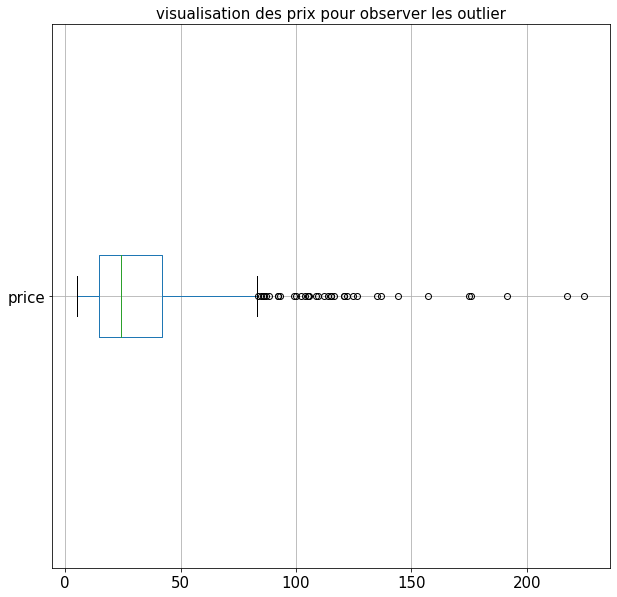

In [52]:
# visualisation de la colonne prix avec l'utilisation d'une boite à moustache
plt.figure(figsize=(10,10))
df_rgpmt.boxplot(column='price', vert=False, fontsize= 15)
plt.title("visualisation des prix pour observer les outlier", fontsize =15)
plt.show()

la visualisation par un boxplot permet d'oberser des outliers sur les prix les plus important.

In [53]:
# calcul des quartile: Q1, Q2,et Q3. Q2 correspond également à la médiane.
Q1 = np.percentile(df_rgpmt["price"],25)
Q2 = np.percentile(df_rgpmt["price"],50)
Q3 = np.percentile(df_rgpmt["price"],75)

print(f"valeur premier quartile: {Q1}")
print(f"valeur deuxième quartile qui est aussi la médiane: {Q2}")
print(f"valeur troisième quartile: {Q3}")

valeur premier quartile: 14.6
valeur deuxième quartile qui est aussi la médiane: 24.4
valeur troisième quartile: 42.0


In [54]:
# utilisation de l'écart interquartile pour déterminer les valeurs aberrantes
EI = Q3 - Q1
# valeurs aberrante supérieur: VAS
VAS = round(Q3 + 1.5*EI,2)
# valeur aberrante inférieur: VAi
VAI = round(Q1 - 1.5*EI,2)

print(f"les valeurs inférieurs a {VAI} euros ou supérieurs a {VAS} euros sont considérée comme aberrante")

les valeurs inférieurs a -26.5 euros ou supérieurs a 83.1 euros sont considérée comme aberrante


In [55]:
# nombre de prix et liste des prix aberrant
val_aberrante = df_rgpmt.loc[(df_rgpmt["price"]<VAI) | (df_rgpmt["price"]>VAS)]['price']
print("les valeurs aberrantes sont aux nombres de:", len(val_aberrante))
val_aberrante.sort_values()

les valeurs aberrantes sont aux nombres de: 37


610     83.7
47      84.7
297     85.6
19      86.1
539     86.8
156     88.4
55      92.0
605     92.0
707     93.0
765     99.0
154    100.0
477    102.3
314    104.0
530    105.0
531    105.0
757    105.6
311    108.5
320    109.6
538    112.0
709    114.0
763    115.0
766    115.0
758    116.4
767    121.0
764    121.0
708    122.0
615    124.8
293    126.5
752    135.0
478    137.0
30     144.0
313    157.0
657    175.0
310    176.0
692    191.3
525    217.5
291    225.0
Name: price, dtype: float64

## methode du z-score

In [56]:
# calculé la moyenne et l'écart type
mean = np.mean(df_rgpmt['price'])
std = np.std(df_rgpmt['price'])
print("la moyenne des prix est de:" ,mean)
print("l'écart type est de:" , std)

la moyenne des prix est de: 32.415636363636374
l'écart type est de: 26.779604366935434


In [57]:
# est considérer comme aberrant, les valeurs ayant un z-score supérieur à 2
seuil = 2
outlier = []
for i in df_rgpmt['price']:
    z = (i-mean)/std
    if np.abs(z) > seuil:
        outlier.append(i)
print('outlier selon le z-score:', outlier)
print('il y a', len(outlier), 'outlier')

outlier selon le z-score: [86.1, 144.0, 92.0, 100.0, 88.4, 225.0, 126.5, 176.0, 108.5, 157.0, 104.0, 109.6, 102.3, 137.0, 217.5, 105.0, 105.0, 112.0, 86.8, 92.0, 124.8, 175.0, 191.3, 93.0, 122.0, 114.0, 135.0, 105.6, 116.4, 115.0, 121.0, 99.0, 115.0, 121.0]
il y a 34 outlier


## création d'un nuage de point des prix pour visualiser les valeurs aberrantes

In [58]:
# création d'un df pour les valeurs normales et d'un df pour les valeurs aberrantes
df_normal = df_rgpmt[(df_rgpmt['price']<VAS) & (df_rgpmt['price']>VAI)]
df_outlier = df_rgpmt[(df_rgpmt['price']>VAS) | (df_rgpmt['price']<VAI)]

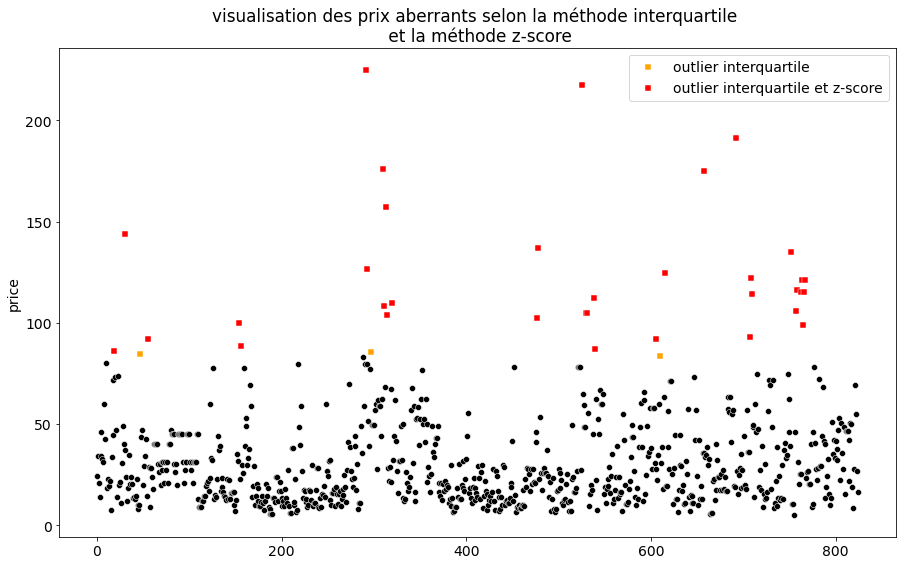

In [59]:
#création du graphique
plt.figure(figsize=(15,9))
plt.rcParams.update({"font.size": 14})
plt.title("visualisation des prix aberrants selon la méthode interquartile \n et la méthode z-score")
sns.scatterplot(data= df_normal, x=df_normal.index, y="price", color="black")
# sélection des valeurs aberrantes selon la méthode interquartile
sns.scatterplot(data= df_outlier, x=df_outlier.index, y="price", color="orange", marker="s", label= "outlier interquartile")
# sélection des valeurs aberrantes selon le z-score
sns.scatterplot(data= df_rgpmt.loc[df_rgpmt["price"].isin(outlier)], x=df_rgpmt.loc[df_rgpmt["price"].isin(outlier)].index, y="price", color="red", marker= "s", label= "outlier interquartile et z-score")
plt.legend(loc="upper right")
plt.show()

La méthode des interquartiles fait ressortir 37 valeurs aberrantes, celle de la méthode z-score détecte 34 valeurs aberrantes.  
Une valeur peut être aberrante mais cela ne la rend pas forcément fausse. Elle est seulement statistiquement supérieur aux autres.  
Pour vérifier il faudrait, par exemple, faire une comparaison avec le prix de bien similaire sur d'autre site internet.